# RDKit

In [1]:
LIBRARY='rdkit'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [3]:
np.random.seed(0)

# Data

In [4]:
with open('../DATA_train.pkl', 'rb') as file:
    data_train=pickle.load(file)
with open('../DATA_test.pkl', 'rb') as file:
    data_test=pickle.load(file)

data_train.shape,data_test.shape

((129, 4725), (56, 4725))

In [5]:
data_train

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,rdkit_mol,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
146,150,OH,1 3 8,-1.82,OH_R138_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f811310ae68>,17,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
160,165,OH,1 2 3 6 7 8,-1.90,OH_R123678_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f811310af10>,17,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,5,OH,1,-1.69,OH_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f811310af80>,17,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
110,114,NH2,2 3 7,-2.20,NH2_R237_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810f006458>,14,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
91,94,NH2,1 6,-1.96,NH2_R16_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810f006650>,14,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,90,CN,1 2 3 4 6 7 8 9,0.51,CN_R12346789_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810edcc110>,7,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
104,108,NH2,1 3 7,-2.19,NH2_R137_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810edcc340>,14,1.0,0.0,1.0,...,0,0,1,0,0,1,0,1,0,0
129,133,NH2,1 4 7 8,-2.27,NH2_R1478_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810edcc570>,14,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
174,179,NO2,2 3 7,-0.74,NO2_R237_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810edcc7a0>,15,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
data_test

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,rdkit_mol,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
139,143,OH,1 9,-1.74,OH_R19_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f811310ae30>,17,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
45,46,CN,1 7,-1.15,CN_R17_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed17688>,7,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
138,142,OH,1 8,-1.86,OH_R18_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed176c0>,17,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
173,178,NO2,1 4 7,-0.70,NO2_R147_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed176f8>,15,1.0,0.0,0.0,...,1,0,1,1,0,1,0,1,0,0
34,35,COOH,2,-1.53,COOH_R2_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed17730>,11,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11,11,S(CH3)2,1,-1.74,S(CH3)2_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed17768>,19,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed177a0>,1,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,1
82,85,CN,2 3 7 8,-0.64,CN_R2378_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed177d8>,7,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
77,80,CN,1 3 6 8,-0.57,CN_R1368_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed17810>,7,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
99,103,NH2,1 2 6,-2.04,NH2_R126_neutral,<rdkit.Chem.rdchem.Mol object at 0x7f810ed17848>,14,1.0,1.0,0.0,...,0,0,1,0,0,1,0,1,0,0


In [7]:
# #TEST DATA
# size=10
# feat_2d=[col for col in data_train.columns if f'_2d_{LIBRARY}' in col][:size]
# feat_3d=[col for col in data_train.columns if f'_3d_{LIBRARY}' in col][:size]
# feat_fp=[col for col in data_train.columns if f'_fp_' in col][:size]
# feat_cols=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol']+feat_2d+feat_3d+feat_fp
# data_train=data_train[feat_cols]
# data_test=data_test[feat_cols]
# data_train.shape,data_test.shape

# Preprocessing

In [8]:
X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 4719) (129,)
(56, 4719) (56,)


In [9]:
from sklearn.preprocessing import StandardScaler

numerical_cols=[col for col in X_train.columns if '_2d_rdkit' in col]
numerical_cols+=[col for col in X_train.columns if '_3d_rdkit' in col]
numerical_cols+=[col for col in X_train.columns if '_2d_mordred' in col]
numerical_cols+=[col for col in X_train.columns if '_3d_mordred' in col]
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
for col in numerical_cols:
    scaler=StandardScaler().fit(X_train[col].values.reshape(-1,1))
    X_train_scaled[col]=scaler.transform(X_train[col].values.reshape(-1,1))
    X_test_scaled[col]=scaler.transform(X_test[col].values.reshape(-1,1))

In [10]:
X_train_scaled.describe().to_csv('DESCRIBE_X_train_scaled.csv',index_label='stat')
X_test_scaled.describe().to_csv('DESCRIBE_X_test_scaled.csv',index_label='stat')

In [11]:
feat_cols_2d_3d_fp=[col for col in X_train_scaled.columns if f'_2d_basic' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if '_fp_' in col]
X_train_scaled_2d_3d_fp=X_train_scaled[feat_cols_2d_3d_fp]
X_test_scaled_2d_3d_fp=X_test_scaled[feat_cols_2d_3d_fp]

# feat_cols_2d_3d=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
# feat_cols_2d_3d+=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
# X_train_scaled_2d_3d=X_train_scaled[feat_cols_2d_3d]
# X_test_scaled_2d_3d=X_test_scaled[feat_cols_2d_3d]

feat_cols_2d_basic=[col for col in X_train_scaled.columns if f'_2d_basic' in col]
X_train_scaled_2d_basic=X_train_scaled[feat_cols_2d_basic]
X_test_scaled_2d_basic=X_test_scaled[feat_cols_2d_basic]

feat_cols_2d=[col for col in X_train_scaled.columns if f'_2d_basic' in col]
feat_cols_2d+=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
X_train_scaled_2d=X_train_scaled[feat_cols_2d]
X_test_scaled_2d=X_test_scaled[feat_cols_2d]

feat_cols_3d=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
X_train_scaled_3d=X_train_scaled[feat_cols_3d]
X_test_scaled_3d=X_test_scaled[feat_cols_3d]

feat_cols_fp=[col for col in X_train_scaled.columns if f'_fp_' in col]
X_train_scaled_fp=X_train_scaled[feat_cols_fp]
X_test_scaled_fp=X_test_scaled[feat_cols_fp]

print(X_train_scaled_2d_3d_fp.shape,X_test_scaled_2d_3d_fp.shape)
# print(X_train_scaled_2d_3d.shape,X_test_scaled_2d_3d.shape)
print(X_train_scaled_2d_basic.shape,X_test_scaled_2d_basic.shape)
print(X_train_scaled_2d.shape,X_test_scaled_2d.shape)
print(X_train_scaled_3d.shape,X_test_scaled_3d.shape)
print(X_train_scaled_fp.shape,X_test_scaled_fp.shape)

(129, 3510) (56, 3510)
(129, 9) (56, 9)
(129, 151) (56, 151)
(129, 869) (56, 869)
(129, 2490) (56, 2490)


# Examples

## - Baseline Models

### 1. Linear Regression

R^2 = 0.9796421142051807


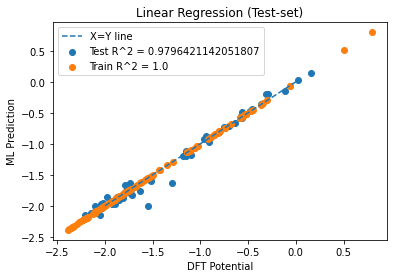

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled_2d_3d_fp, y_train)

y_pred=reg.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)

y_pred_train=reg.predict(X_train_scaled_2d_3d_fp)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Linear Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 2. SVR

R^2 = 0.8791832313215249


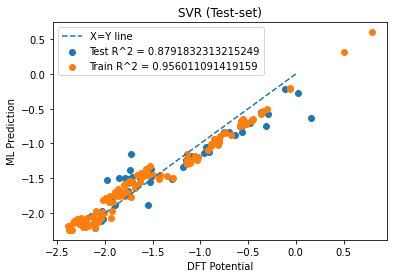

In [13]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled_2d_3d_fp, y_train)

y_pred=svr.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)


y_pred_train=svr.predict(X_train_scaled_2d_3d_fp)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('SVR (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 3. Gradient Boosting Regression

R^2 = 0.9856091068155443


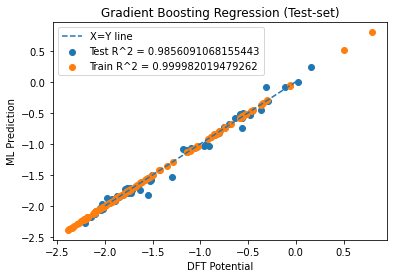

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled_2d_3d_fp, y_train)

y_pred=gbr.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)

y_pred_train=gbr.predict(X_train_scaled_2d_3d_fp)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Gradient Boosting Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

## - Hyper-Parameter Tuning (Kernel Ridge Regression)

{'alpha': 0.0001, 'gamma': 1e-06, 'kernel': 'rbf'}
R^2 = 0.937882464703258
R^2 = 0.9839036371437149


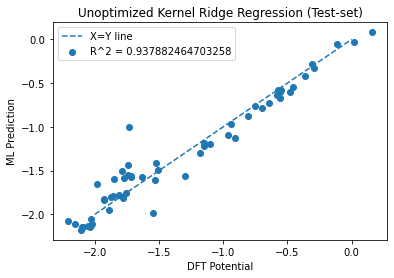

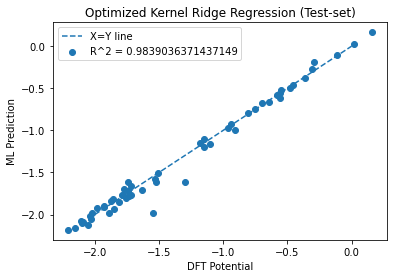

In [15]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':np.linspace(1e-4,1,10)}

scoring = ['neg_mean_squared_error','r2']

estimator = KernelRidge()

krr_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1
                 )
krr_gs.fit(X_train_scaled_2d_3d_fp, y_train)
display.clear_output()
print(krr_gs.best_params_)

plt.figure()
krr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled_2d_3d_fp, y_train)
y_pred=krr_reg.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Unoptimized Kernel Ridge Regression (Test-set)')
plt.legend()

plt.figure()
y_pred=krr_gs.best_estimator_.predict(X_test_scaled_2d_3d_fp)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Optimized Kernel Ridge Regression (Test-set)')
plt.legend()

## Feature Importance

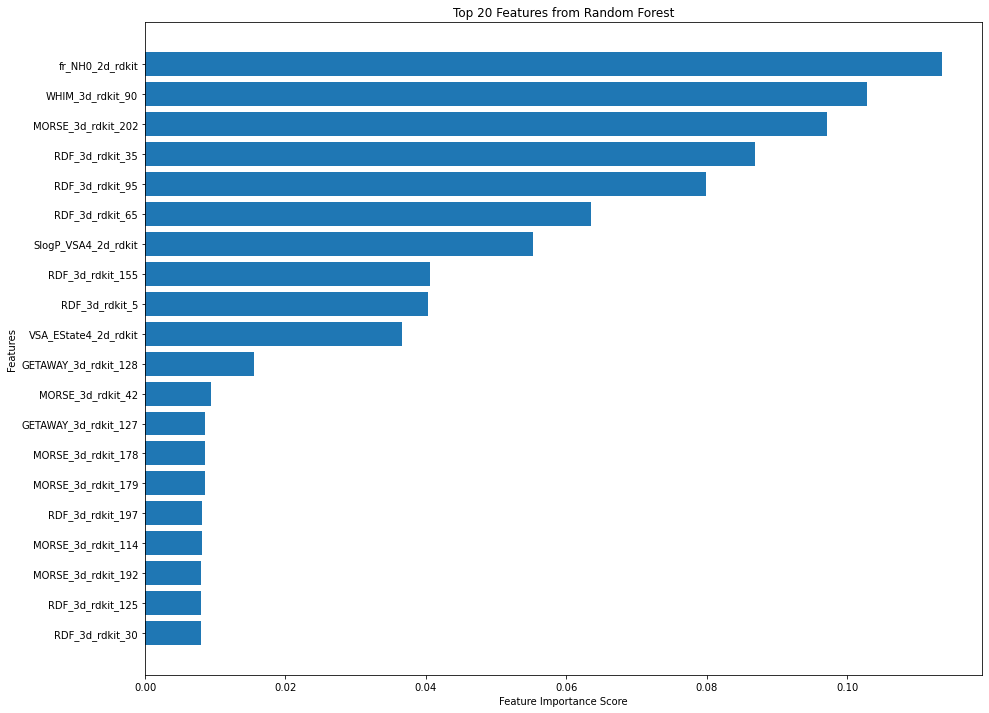

In [16]:
from sklearn.ensemble import RandomForestRegressor

feat_idx2name={idx:col for idx,col in enumerate(X_train_scaled_2d_3d_fp.columns)}
feat_name2idx={col:idx for idx,col in enumerate(X_train_scaled_2d_3d_fp.columns)}
feat_name_list=X_train_scaled_2d_3d_fp.columns

ntop=20
rf_reg=RandomForestRegressor().fit(X_train_scaled_2d_3d_fp, y_train)
rf_feat_score = rf_reg.feature_importances_
rf_feat_score_sorted_idx=rf_feat_score.argsort()
plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:feat_idx2name[x],rf_feat_score_sorted_idx))
plt.barh(rf_top_features[-ntop:],rf_feat_score[rf_feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Random Forest')
plt.show()

## - Model Performance on Top 20 Features (CV)

(129, 3510) (56, 3510)
R^2 = 0.9068818342726113


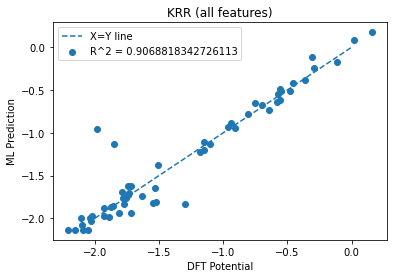

(129, 20) (56, 20)
R^2 = -3.859313331083322


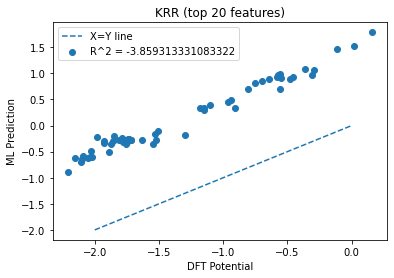

In [17]:
from sklearn.kernel_ridge import KernelRidge

print(X_train_scaled_2d_3d_fp.shape,X_test_scaled_2d_3d_fp.shape)
krr_reg=KernelRidge().fit(X_train_scaled_2d_3d_fp, y_train)
y_pred=krr_reg.predict(X_test_scaled_2d_3d_fp)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (all features)')
plt.legend()
plt.show()

plt.figure()
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train,_X_test=X_train_scaled_2d_3d_fp.iloc[:,rf_top_features_idx[-ntop:]],X_test_scaled_2d_3d_fp.iloc[:,rf_top_features_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
krr_reg =KernelRidge().fit(_X_train, y_train)
y_pred=krr_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (top 20 features)')
plt.legend()


# Multiple Models

## Unoptimized Models

## Optimized Models (Hyper-parameter Tuning)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor



MODELS_DICT_UNOPT={'linear_reg':LinearRegression(),
             'ridge':Ridge(),
             'lasso':Lasso(),
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':ElasticNet(),
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':LassoLars(),
             'omp':OrthogonalMatchingPursuit(),
             'bayesian_ridge':BayesianRidge(),
             'ARDR':ARDRegression(),
             'PA':PassiveAggressiveRegressor(),
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':HuberRegressor(epsilon=1,
                                     alpha=1e-3,
                                     tol=1e-6,
                                     max_iter=50000),
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':KernelRidge(kernel='rbf'),
             'SVR':SVR(),
             'gaussian_process':GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
             'decision_tree':DecisionTreeRegressor(),
             'bagging':BaggingRegressor(),
             'random_forest':RandomForestRegressor(),
             'ada_boost':AdaBoostRegressor(),
             'gradient_boosting_reg':GradientBoostingRegressor(),
#              'hist_gradient_boosting_reg':HistGradientBoostingRegressor(),
             'neural_network':MLPRegressor(hidden_layer_sizes=(50,20),
                                            max_iter=10000),
             'knn_reg':KNeighborsRegressor()
            }

PARAM_GRID_DICT={'linear_reg':{'fit_intercept':[True,False],
                               'normalize':[True,False],
                               'positive':[True,False]
                              },
                 'ridge':{'alpha':[0.5,1,1.5],
                          'tol':[1e-3,1e-4,1e-5],
                          'max_iter':[500,1000,5000],
                          'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                         },
                 'lasso':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                          'positive':[True,False],
                          'tol':[1e-4,1e-5,1e-6,1e-7],
                          'max_iter':[100,200,500,1000],
                         },
    #              'multitask_lasso':MultiTaskLasso(),
                 'elastic_net':{'alpha':[0.5,1,1.5],
                                'l1_ratio':[0.2,0.5,0.8],
                                'positive':[True,False],
                                'tol':[1e-3,1e-4,1e-5],
                                'max_iter':[500,1000,5000]
                               },
    #              'multitask_elastic_net':MultiTaskElasticNet(),
    #              'lars':Lars(n_nonzero_coefs=50),
                 'lasso_lars':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                                'jitter':[None,0.1,1,10,100],
                                'positive':[True,False],
                                'max_iter':[100,200,500,1000],
                               },
                 'omp':{#'n_nonzero_coefs':[None,5,10,20],
    #                   'tol':[0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7]
                       },
                 'bayesian_ridge':{'n_iter':[200,300,500],
                                   'tol':[1e-2,1e-3,1e-4],
                                   'alpha_1':[1e-5,1e-6,1e-7],
                                   'alpha_2':[1e-5,1e-6,1e-7],
                                   'lambda_1':[1e-5,1e-6,1e-7],
                                   'lambda_2':[1e-5,1e-6,1e-7],
                                  },
                 'ARDR':{'n_iter':[200,300,500],
                         'tol':[1e-2,1e-3,1e-4],
                         'alpha_1':[1e-5,1e-6,1e-7],
    #                      'alpha_2':[1e-5,1e-6,1e-7],
                         'lambda_1':[1e-5,1e-6,1e-7],
    #                      'lambda_2':[1e-5,1e-6,1e-7],
    #                      'threshold_lambda':[5000,10000,20000]
                        },
                 'PA':{'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.15],
                       'max_iter':[100,200,500,1000,1500,2000],
                       'tol':[1e-5,1e-6,1e-7,1e-8],
    #                    'early_stopping':[True,False],
    #                    'average':[True,False],
    #                    'validation_fraction':[0.05,0.1,0.2]
                      },
    #              'RANSAC':RANSACRegressor(min_samples=129)),
                 'huber':{'epsilon':[1,1.35,1.5],
                          'alpha':[1e-3,1e-4,1e-5],
                          'tol':[1e-5,1e-6,1e-7],
                          'max_iter':[1000,50000]
                         },
    #              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
    #                                                ('linear', LinearRegression(fit_intercept=True))]),
                 'kernel_ridge':{'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
                                 'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
                                 'alpha':[0.01,0.1,1,5,10,100]
                                },
                 'SVR':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                        'C':[0.5,1,1.5],
                        'tol':[1e-2,1e-3,1e-4],
                        'gamma':['scale','auto']
                       },
                 'gaussian_process':{'kernel':[DotProduct()+WhiteKernel(),
                                               RBF()+WhiteKernel(),
                                               34.4**2 * RBF(length_scale=41.8)
                                                + 3.27**2 * RBF() * ExpSineSquared()
                                                + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
                                                + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336),
                                               ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
                                              ],
                                     'alpha':[1e-9,1e-10,1e-11]
                                    },
                 'decision_tree':{#'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
    #                               'splitter':['best','random'],
    #                               'max_features':['auto', 'sqrt', 'log2'],
    #                               'ccp_alpha':[-1,0,0.1,0.5,1],
                                  'max_depth':[None,10,20,50,100,200]
                                 },
                 'bagging':{'n_estimators': np.arange(50,1000,50),
                            'bootstrap':[True,False],
                            'bootstrap_features':[True,False],
                            'oob_score':[True,False]
                           },
                 'random_forest':{'n_estimators': np.arange(50,501,50),
                                  'bootstrap':[True,False],
                                  'oob_score':[True,False],
    #                               'criterion':['mse', 'mae'],
    #                               'max_features':['auto', 'sqrt', 'log2'],
    #                               'ccp_alpha':[0,0.5,1]
                                  },
                 'ada_boost':{'n_estimators': np.arange(50,501,50),
                              'learning_rate':[0.5,1,1.5],
                              'loss':['linear', 'square', 'exponential']
                             },
                 'gradient_boosting_reg':{#'loss':['ls', 'lad', 'huber', 'quantile'],
    #                                       'learning_rate':[0.5,1,1.5],
                                          'n_estimators': np.arange(50,501,50),
    #                                       'criterion':['friedman_mse', 'mse', 'mae'],
                                          'max_depth':[2,3,10,20,50],
    #                                       'max_features':['auto', 'sqrt', 'log2'],
    #                                       'alpha':[0.6,0.9,1.2],
                                          'tol':[1e-2,1e-3,1e-4],
    #                                       'ccp_alpha':[0.5,1,1.5]
                                         },
    #              'hist_gradient_boosting_reg':{},
                 'neural_network':{'hidden_layer_sizes':[(10,10,10),(50,30,20),(80,60,30)],
                                   'activation':['logistic', 'tanh', 'relu'],
                                   'solver':['lbfgs', 'sgd', 'adam'],
                                   'learning_rate':['constant', 'invscaling', 'adaptive'],
                                   'early_stopping':[True,False]
                                  },
                 'knn_reg':{'n_neighbors':np.arange(1,10,2),
                            'weights':['uniform', 'distance'],
                            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'leaf_size':[40,50,75]
                           }
                }
print(f'Total Models = {len(PARAM_GRID_DICT)}')
print(f'Total Models = {len(MODELS_DICT_UNOPT)}')

Total Models = 20
Total Models = 20


In [19]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def gridSearch(feat_type,X,y,models_dict_unopt,param_grid_dict,read=False):
    outfile_name=f'MODEL_OPT_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_df
        else:
            pass
        
    gs_results_dict={'feat_set':[],'model_name':[],'gs_obj':[],'opt_model':[],'opt_params':[],}
    scoring='neg_mean_squared_error'
    # test_model='PA'
    # for model_name,param_grid in [(test_model,param_grid_dict[test_model])]:
    for model_name,param_grid in param_grid_dict.items():
        print(model_name)
        unopt_estimator=models_dict_unopt[model_name]
        gs = GridSearchCV(unopt_estimator,
                          param_grid=param_grid,
                          scoring=scoring,
                          refit=True,
                          return_train_score=True,
                          cv=10,
                          verbose=1,
                          n_jobs=-1
                         )
        gs.fit(X, y)
        gs_results_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        gs_results_dict['model_name'].append(model_name)
        gs_results_dict['gs_obj'].append(gs)
        gs_results_dict['opt_model'].append(gs.best_estimator_)
        gs_results_dict['opt_params'].append(gs.best_params_)
    clear_output()
    model_opt_df=pd.DataFrame.from_dict(gs_results_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(model_opt_df,outfile)
    return model_opt_df

def cv(feat_type,opt_models,X,y,read=False):
    outfile_name=f'CV_RESULT_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_d
        else:
            pass
    
    num_folds=10
    cv_result_dict={'feat_set':[],'model_name':[],'cv_score_obj':[],'cv_mean_test_r2':[],'cv_mean_test_mse':[],'cv_mean_test_mae':[]}
    scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error']
    pbar=tqdm(opt_models.iterrows())
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        model=row['opt_model']
        scores=cross_validate(model,
                              X,
                              y,
                              cv=num_folds,
                              scoring=scoring,
                              return_train_score=True,
                              n_jobs=-1
                             )
                            
        cv_mean_test_r2=scores['test_r2'].mean()
        cv_mean_test_mse=-scores['test_neg_mean_squared_error'].mean()
        cv_mean_test_mae=-scores['test_neg_mean_absolute_error'].mean()
        cv_result_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        cv_result_dict['model_name'].append(model_name)
        cv_result_dict['cv_score_obj'].append(scores)
        cv_result_dict['cv_mean_test_r2'].append(cv_mean_test_r2)
        cv_result_dict['cv_mean_test_mse'].append(cv_mean_test_mse)
        cv_result_dict['cv_mean_test_mae'].append(cv_mean_test_mae)
    cv_result_df=pd.DataFrame.from_dict(cv_result_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(cv_result_df,outfile)
    return cv_result_df

def trainTestErrors(feat_type,opt_models,X_train,y_train,X_test,y_test,read=False):
    outfile_name=f'TRAIN_TEST_ERROR_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_df
        else:
            pass
        
    train_test_error_dict={'feat_set':[],'model_name':[],
                     'train_r2':[],'train_mse':[],'train_mae':[],
                     'test_r2':[],'test_mse':[],'test_mae':[],
                     'pred_train':[],'pred_test':[]
                    }
    pbar=tqdm(opt_models.iterrows())
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        model=row['opt_model']
        pred_train=model.predict(X_train)
        train_r2=r2_score(y_train,pred_train)
        train_mse=mean_squared_error(y_train,pred_train)
        train_mae=mean_absolute_error(y_train,pred_train)
        pred_test=model.predict(X_test)
        test_r2=r2_score(y_test,pred_test)
        test_mse=mean_squared_error(y_test,pred_test)
        test_mae=mean_absolute_error(y_test,pred_test)
        train_test_error_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        train_test_error_dict['model_name'].append(model_name)
        train_test_error_dict['train_r2'].append(train_r2)
        train_test_error_dict['train_mse'].append(train_mse)
        train_test_error_dict['train_mae'].append(train_mae)
        train_test_error_dict['test_r2'].append(test_r2)
        train_test_error_dict['test_mse'].append(test_mse)
        train_test_error_dict['test_mae'].append(test_mae)
        train_test_error_dict['pred_train'].append(pred_train)
        train_test_error_dict['pred_test'].append(pred_test)
    train_test_error_df=pd.DataFrame.from_dict(train_test_error_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(train_test_error_df,outfile)
    return train_test_error_df

def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

def getModelPerformance(feat_type,X_train,y_train,X_test,y_test,read=False):
    outfile_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_performance_df=getDataFromFile(outfile_name)
        if model_performance_df is not None:
            return model_performance_df
        else:
            pass

    _model_opt_df=gridSearch(feat_type,X_train,y_train,MODELS_DICT_UNOPT,PARAM_GRID_DICT,read=read)
    _cv_result_df=cv(feat_type,_model_opt_df,X_train,y_train,read=read)
    _train_test_error_df=trainTestErrors(feat_type,_model_opt_df,X_train,y_train,X_test,y_test,read=read)
    model_performance_df=_model_opt_df.merge(_cv_result_df.drop(columns='feat_set'),how='left',on='model_name')
    model_performance_df=model_performance_df.merge(_train_test_error_df.drop(columns='feat_set'),how='left',on='model_name')
    with open(outfile_name,'wb') as outfile:
        pickle.dump(model_performance_df,outfile)
    return model_performance_df

In [20]:
%%time

feat_type='2d+3d+fp'

model_performance_df_2d_3d_fp=getModelPerformance(feat_type,
                    X_train_scaled_2d_3d_fp,y_train,
                    X_test_scaled_2d_3d_fp,y_test,
                    read=False                            
                   )

model_performance_df_2d_3d_fp

knn_reg: : 20it [02:03,  6.15s/it]              
knn_reg: : 20it [00:02,  8.74it/s]              


CPU times: user 5min 59s, sys: 10min 19s, total: 16min 19s
Wall time: 1h 53min 24s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d+3d+fp_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.15361475944519043, 0.130455255...",0.983199,0.007409,0.053572,1.000000,2.617999e-30,1.264708e-15,0.979642,0.008967,0.058412,"[-1.8199999999999998, -1.9000000000000032, -1....","[-1.720436170404347, -1.1194803111245282, -1.8..."
1,2d+3d+fp_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=1000, solver='saga')","{'alpha': 1.5, 'max_iter': 1000, 'solver': 'sa...","{'fit_time': [3.561373710632324, 3.92049884796...",0.990185,0.004132,0.042880,0.998625,6.350494e-04,1.558507e-02,0.983675,0.007190,0.049414,"[-1.8253199057747798, -1.8704429161024754, -1....","[-1.7298225600864703, -1.1064423170100577, -1...."
2,2d+3d+fp_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...",Lasso(alpha=0.01),"{'alpha': 0.01, 'max_iter': 1000, 'positive': ...","{'fit_time': [0.6483860015869141, 0.6468825340...",0.989111,0.004586,0.052193,0.994778,2.412081e-03,3.784317e-02,0.977102,0.010085,0.062278,"[-1.8078315095110364, -1.8339238083406562, -1....","[-1.7506238607329851, -1.106968948317868, -1.7..."
3,2d+3d+fp_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.14464855194091797, 0.235483646...",0.928121,0.031863,0.144635,0.950008,2.309256e-02,1.287389e-01,0.933488,0.029295,0.140062,"[-1.774945892636604, -1.831672326530771, -1.79...","[-1.7851978760742475, -1.1480002554318116, -1...."
4,2d+3d+fp_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.0745401382446289, 0.0736603736...",0.951679,0.021497,0.121099,0.952804,2.180117e-02,1.226376e-01,0.943513,0.024880,0.132244,"[-1.7623748527227237, -1.8143022659097747, -1....","[-1.7292367965872932, -1.1844808057306615, -1...."
5,2d+3d+fp_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.20814228057861328, 0.076667785...",-3.623841,1.977335,0.640993,1.000000,2.658321e-30,1.045245e-15,0.969094,0.013613,0.080105,"[-1.8199999999999996, -1.9000000000000004, -1....","[-1.7653323889702086, -1.1012588984401468, -1...."
6,2d+3d+fp_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.9941904544830322, 0.7111179828...",0.989250,0.004550,0.044546,0.999429,2.636117e-04,9.762917e-03,0.983136,0.007428,0.049834,"[-1.8209482382324151, -1.8826256108392414, -1....","[-1.7204716660730235, -1.1105019773911364, -1...."
7,2d+3d+fp_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(lambda_1=1e-07, n_iter=200, tol=...","{'alpha_1': 1e-06, 'lambda_1': 1e-07, 'n_iter'...","{'fit_time': [1.2162821292877197, 1.1984250545...",0.981171,0.007897,0.060572,0.999928,3.344841e-05,4.264126e-03,0.981071,0.008337,0.054503,"[-1.8201663453014216, -1.894557787590133, -1.6...","[-1.6491931641314166, -1.1605476772234176, -1...."
8,2d+3d+fp_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.7, max_iter=500...","{'C': 0.7, 'max_iter': 500, 'tol': 1e-06}","{'fit_time': [0.10679841041564941, 0.092959403...",0.909441,0.037061,0.101506,0.991501,3.925726e-03,5.254916e-02,0.914752,0.037548,0.118976,"[-1.7596691507242646, -1.8192600886764285, -1....","[-1.7111125156786524, -1.1121342248135335, -1...."
9,2d+3d+fp_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...",HuberRegressor(max_iter=50000),"{'alpha': 0.0001, 'epsilon': 1.35, 'max_iter':

In [21]:
# %%time

# feat_type='2d+3d'

# model_performance_df_2d_3d=getModelPerformance(feat_type,
#                     X_train_scaled_2d_3d,y_train,
#                     X_test_scaled_2d_3d,y_test,
#                     read=False                            
#                    )

# model_performance_df_2d_3d

In [22]:
%%time

feat_type='2d'

model_performance_df_2d=getModelPerformance(feat_type,
                    X_train_scaled_2d,y_train,
                    X_test_scaled_2d,y_test,
                    read=False                            
                   )

model_performance_df_2d

knn_reg: : 20it [00:13,  1.45it/s]              
knn_reg: : 20it [00:00, 33.52it/s]              


CPU times: user 2min 25s, sys: 6min, total: 8min 25s
Wall time: 9min 30s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.014279603958129883, 0.01223158...",-6135.682627,2479.935833,7.016455,0.997210,1.288703e-03,0.026620,-9.229913e+22,4.065315e+22,7.448672e+10,"[-1.834228515625, -1.8955078125, -1.7409667968...","[-1.54638671875, -1.148193359375, -1.749023437..."
1,2d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='saga')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...","{'fit_time': [0.1080467700958252, 0.1151845455...",0.984656,0.006474,0.053482,0.995911,1.888895e-03,0.031427,9.846065e-01,6.780051e-03,5.402887e-02,"[-1.8473033809641297, -1.8436097762526642, -1....","[-1.773651218158276, -1.1301379433670502, -1.8..."
2,2d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...",Lasso(alpha=0.01),"{'alpha': 0.01, 'max_iter': 1000, 'positive': ...","{'fit_time': [0.017702817916870117, 0.02115201...",0.986186,0.005929,0.062224,0.990954,4.178485e-03,0.052431,9.652037e-01,1.532604e-02,8.125794e-02,"[-1.8098737025772105, -1.8371824058600736, -1....","[-1.7832605319869639, -1.1287609118430528, -1...."
3,2d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.004906415939331055, 0.01002955...",0.917511,0.035892,0.153975,0.931993,3.141421e-02,0.145301,8.858137e-01,5.029333e-02,1.774872e-01,"[-1.7701467641628166, -1.7331286149828604, -1....","[-1.8131803963128765, -1.1753164401589966, -1...."
4,2d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.004374027252197266, 0.00456571...",0.946694,0.023653,0.130826,0.946971,2.449543e-02,0.133802,9.154509e-01,3.723964e-02,1.564383e-01,"[-1.7443349917646414, -1.798888343379248, -1.7...","[-1.7236799935458813, -1.194835404307926, -1.7..."
5,2d_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.009132146835327148, 0.00812840...",0.805997,0.102746,0.080095,0.994550,2.517713e-03,0.038748,9.750479e-01,1.099015e-02,6.753736e-02,"[-1.8636457258774655, -1.8228901177670942, -1....","[-1.8105309104284995, -1.1349906987525793, -1...."
6,2d_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.009047746658325195, 0.01234149...",0.983817,0.006823,0.053130,0.996208,1.751533e-03,0.029835,9.839190e-01,7.082888e-03,5.416066e-02,"[-1.8473755958598699, -1.8437436449090974, -1....","[-1.779567273017377, -1.1286985874371849, -1.8..."
7,2d_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(lambda_1=1e-05, n_iter=200, tol=...","{'alpha_1': 1e-06, 'lambda_1': 1e-05, 'n_iter'...","{'fit_time': [0.07320332527160645, 0.087406396...",0.986009,0.005958,0.051925,0.995805,1.937866e-03,0.032850,9.806301e-01,8.531477e-03,6.587906e-02,"[-1.8576161554971775, -1.8408916262006318, -1....","[-1.8075466738131833, -1.135821014143764, -1.8..."
8,2d_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.9, max_iter=500...","{'C': 0.9, 'max_iter': 500, 'tol': 1e-07}","{'fit_time': [0.007369041442871094, 0.01109886...",0.890420,0.044987,0.135406,0.980272,9.112774e-03,0.078362,7.614222e-01,1.050816e-01,1.581369e-01,"[-1.7720075792730876, -1.7762699114350382, -1....","[-1.776792838196481, -1.071635951948823, -1.69..."
9,2d_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=0.001, epsilon=1, max_ite...","{'alpha

In [23]:
%%time

feat_type='3d'

model_performance_df_3d=getModelPerformance(feat_type,
                    X_train_scaled_3d,y_train,
                    X_test_scaled_3d,y_test,
                    read=False                            
                   )

model_performance_df_3d

knn_reg: : 20it [00:59,  2.97s/it]              
knn_reg: : 20it [00:01, 18.81it/s]              


CPU times: user 3min 50s, sys: 7min 25s, total: 11min 16s
Wall time: 45min 54s


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,3d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.018986940383911133, 0.02268671...",0.953141,0.020265,0.094857,0.999992,0.000003,0.000233,0.940281,0.026303,0.114780,"[-1.8200000000000005, -1.8999999999999981, -1....","[-2.0047172038056074, -1.0484254770071115, -1...."
1,3d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='saga')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...","{'fit_time': [1.0272479057312012, 0.9127109050...",0.989390,0.004475,0.050251,0.997398,0.001202,0.023672,0.976041,0.010553,0.061657,"[-1.8222335947776105, -1.8575390384388206, -1....","[-1.7699074815888056, -1.080329762095154, -1.8..."
2,3d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'max_iter': 100, 'positive': F...","{'fit_time': [0.021122455596923828, 0.02500224...",0.980422,0.009062,0.062274,0.993054,0.003209,0.043739,0.981309,0.008233,0.058510,"[-1.821148110405556, -1.8816392627568663, -1.7...","[-1.7936345472152753, -1.1029383644063386, -1...."
3,3d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.03652453422546387, 0.032904863...",0.930348,0.031549,0.138503,0.950987,0.022640,0.124279,0.951300,0.021450,0.118346,"[-1.7430535024451954, -1.8472495807053275, -1....","[-1.7395706040798626, -1.191780609137461, -1.7..."
4,3d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.016234636306762695, 0.02174329...",0.943821,0.024128,0.126297,0.947253,0.024365,0.127904,0.944010,0.024661,0.128148,"[-1.74936786678954, -1.8486045549688002, -1.72...","[-1.741203844408214, -1.1716817404849567, -1.7..."
5,3d_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.027448415756225586, 0.01935982...",0.522716,0.272666,0.216232,0.999643,0.000165,0.009260,0.844346,0.068558,0.168843,"[-1.811306923367336, -1.8787245444244034, -1.6...","[-1.914021096713166, -1.050892152223727, -1.82..."
6,3d_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.03678703308105469, 0.051003217...",0.988957,0.004668,0.050577,0.998046,0.000903,0.020034,0.976122,0.010517,0.062432,"[-1.8210908808696928, -1.8650421244787436, -1....","[-1.7703106623665037, -1.0800416310182652, -1...."
7,3d_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-05, 'n_iter'...","{'fit_time': [0.19837284088134766, 0.127732515...",0.971252,0.012801,0.071136,0.999135,0.000399,0.014604,0.962855,0.016360,0.084576,"[-1.8395075781130674, -1.889689768249971, -1.7...","[-1.7289472292272055, -1.0890695657862066, -1...."
8,3d_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.6, max_iter=200...","{'C': 0.6, 'max_iter': 2000, 'tol': 1e-06}","{'fit_time': [0.05049443244934082, 0.059068918...",-5.520804,3.106954,0.756523,0.987454,0.005795,0.070437,0.965925,0.015008,0.094867,"[-1.7468484060037315, -1.8329204662406127, -1....","[-1.740804951104786, -1.0383118668024047, -1.7..."
9,3d_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=1e-05, epsilon=1.5, max_i...","{'alpha': 1e-05, 'epsilon': 1.5, 'max_iter': 5...","{'fit_time': [11.020102739334106, 13.206368207...",-2.428203,1.595531,0.511671,0.999845,0

In [ ]:
%%time

feat_type='fp_deepchem'

model_performance_df_fp=getModelPerformance(feat_type,
                    X_train_scaled_fp,y_train,
                    X_test_scaled_fp,y_test,
                    read=False                            
                   )

model_performance_df_fp

linear_reg
Fitting 10 folds for each of 8 candidates, totalling 80 fits
ridge
Fitting 10 folds for each of 189 candidates, totalling 1890 fits
lasso
Fitting 10 folds for each of 192 candidates, totalling 1920 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025349662327782685, tolerance: 0.005958843875968993
  positive)


elastic_net
Fitting 10 folds for each of 162 candidates, totalling 1620 fits
lasso_lars
Fitting 10 folds for each of 240 candidates, totalling 2400 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.201e-02, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


omp
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


bayesian_ridge
Fitting 10 folds for each of 729 candidates, totalling 7290 fits
ARDR
Fitting 10 folds for each of 81 candidates, totalling 810 fits
PA
Fitting 10 folds for each of 192 candidates, totalling 1920 fits
huber
Fitting 10 folds for each of 54 candidates, totalling 540 fits
kernel_ridge
Fitting 10 folds for each of 252 candidates, totalling 2520 fits
SVR
Fitting 10 folds for each of 72 candidates, totalling 720 fits
gaussian_process
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


decision_tree
Fitting 10 folds for each of 6 candidates, totalling 60 fits
bagging
Fitting 10 folds for each of 152 candidates, totalling 1520 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.02888443 -0.03293902 -0.02689344 -0.03100365 -0.03046255 -0.0289397
 -0.03104259 -0.03188611 -0.02988009 -0.03042108 -0.02921576 -0.02867616
 -0.02960783 -0.03021299 -0.03018947 -0.0303465  -0.02935411 -0.02899131
 -0.02904942 -0.03138765 -0.03075796 -0.02932439 -0.02898004 -0.02987151
 -0.0287798  -0.02932252 -0.03026648 -0.03039435 -0.02981942 -0.02916333
 -0.02920946 -0.02845393 -0.02939795 -0.02960635 -0.0290972  -0.02942571
 -0.0304081  -0.03009747 -0.03072424 -0.03431642 -0.03092737 -0.03257031
 -0.0304075  -0.03297125 -0.03344718 -0.03130808 -0.03235331 -0.03043949
 -0.03288251 -0.03287855 -0.03034487 -0.03295074 -0.03280727 -0.0329542
 -0.03189611 -0.03283591 -0.03127464 -0.03113619 -0.03214424 -0.03160343
 -0.0321691  -0.03193869 -0.0318637  -0.03109166 -0.03087678 -0.03148524
 -0.03081588 -0.03096417 -0.03208837 -0.03161641 

random_forest
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.032783   -0.02730083 -0.03257312 -0.03121454 -0.03222983 -0.03248792
 -0.03132038 -0.03338868 -0.03267504 -0.030486   -0.03134864 -0.03175134
 -0.03233958 -0.03158474 -0.03146718 -0.03002101 -0.03120071 -0.03264772
 -0.03124626 -0.0319683          nan -0.03725804         nan -0.03866357
         nan -0.03803557         nan -0.03833198         nan -0.03784876
         nan -0.03871851         nan -0.03871909         nan -0.03853364
         nan -0.03757544         nan -0.03845044]
  category=UserWarning
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [-5.27398524e-03 -4.60573844e-03 -4.54255588e-03 -4.64730287e-03
 -4.18341874e-03 -4.24663478e-03 -4.46678603e-03 -4.65628042e-03
 -4.67249540e-03 -4.48774668e-03 -4.42966177e-03 -4.438150

ada_boost
Fitting 10 folds for each of 90 candidates, totalling 900 fits
gradient_boosting_reg
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
neural_network
Fitting 10 folds for each of 162 candidates, totalling 1620 fits


# Feature Importance

In [ ]:
#use all models trained on all featurs
#No Need to make correlation plot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV

def calcFeatureImportance(feat_type,model_performance_df,X_train,y_train,read=False):
    outfile_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        feat_imp_df=getDataFromFile(outfile_name)
        if feat_imp_df is not None:
            return feat_imp_df
        else:
            pass

    #Tree-Based
    feat_imp_df=pd.DataFrame()
    feat_cols=X_train.columns
    feat_imp_df['feat_name']=feat_cols
    for model_name in tqdm(['random_forest','ada_boost','gradient_boosting_reg']):
        print(model_name)
        model=model_performance_df[model_performance_df['model_name']==model_name]['opt_model'].values[0]
        model_feat_score=model.feature_importances_
        feat_imp_df[f'{model_name}_score']=model_feat_score
#         permutation_imp_selector = permutation_importance(model,
#                                           X_train, y_train,
#                                           scoring='neg_mean_squared_error',
#                                           n_jobs=-1)
#         permutation_imp_feat_score=permutation_imp_selector.importances_mean
#         permutation_imp_feat_score_std=permutation_imp_selector.importances_std
#         feat_imp_df[f'{model_name}_permutation_imp_score']=permutation_imp_feat_score
#         feat_imp_df[f'{model_name}_permutation_imp_score_std']=permutation_imp_feat_score_std
#         rfecv_selector = RFECV(model,
#                          scoring='neg_mean_squared_error',
#                          cv=10,
#                          n_jobs=-1)
#         rfecv_selector = rfecv_selector.fit(X_train, y_train)
#         rfecv_feat_ranking=rfecv_selector.ranking_
#         feat_imp_df[f'{model_name}_rfcv_feat_ranking']=rfecv_feat_ranking

    #K-Best
    kbest_selector=SelectKBest(mutual_info_regression,
                               k='all').fit(X_train, y_train)
    feat_score=kbest_selector.scores_
    feat_imp_df['kbest_selector_score']=feat_score
    
    with open(outfile_name,'wb') as outfile:
        pickle.dump(feat_imp_df,outfile)
    return feat_imp_df
#     #Permuation Importance
#     pbar=tqdm(model_performance_df_2d_3d_fp.iterrows())
#     feat_score_list=[]
#     for idx,row in pbar:
#         model_name=row['model_name']
#         pbar.set_description(model_name)
#         estimator=row['opt_model']
#         selector = permutation_importance(estimator,
#                                           X_train, y_train,
#                                           scoring='neg_mean_squared_error',
#                                           n_jobs=-1)
#         feat_score=selector.importances_mean
#         feat_score_list.append(feat_score)
#     mean_feat_score=np.array(feat_score_list).mean(axis=0)
#     feat_imp_df['permutation_imp_score_list']=feat_score_list
#     feat_imp_df['mean_permutation_imp_score']=mean_feat_score
#     with open(outfile_name,'wb') as outfile:
#             pickle.dump(feat_imp_df,outfile)


In [ ]:
%%time

feat_type='2d+3d+fp'

feat_imp_df_2d_3d_fp=calcFeatureImportance(feat_type,
                    model_performance_df_2d_3d_fp,
                    X_train_scaled_2d_3d_fp,
                    y_train,
                    read=False                           
                   )

feat_imp_df_2d_3d_fp

In [ ]:
%%time

feat_type='2d'

feat_imp_df_2d=calcFeatureImportance(feat_type,
                    model_performance_df_2d,
                    X_train_scaled_2d,
                    y_train,
                    read=False                           
                   )

feat_imp_df_2d

In [ ]:
%%time

feat_type='3d'

feat_imp_df_3d=calcFeatureImportance(feat_type,
                    model_performance_df_3d,
                    X_train_scaled_3d,
                    y_train,
                    read=False                           
                   )

feat_imp_df_3d

In [ ]:
%%time

feat_type='fp_deepchem'

feat_imp_df_fp=calcFeatureImportance(feat_type,
                    model_performance_df_fp,
                    X_train_scaled_fp,
                    y_train,
                    read=False                           
                   )

feat_imp_df_fp

In [ ]:
# %%time
# from sklearn.feature_selection import RFECV

# pbar=tqdm(model_opt_data_df.iterrows())
# for idx,row in pbar:
#     model_name=row['model_name']
#     pbar.set_description(model_name)
#     if model_name in ['huber','kernel_ridge','gaussian_process','bagging','neural_network','knn_reg']:
#         continue
#     estimator=row['best_model']
#     selector = RFECV(estimator,
#                      scoring='neg_mean_squared_error',
#                      cv=10,
#                      n_jobs=-1)
#     selector = selector.fit(X_train_scaled, y_train)
#     feat_score=selector.ranking_
#     feat_score_sorted_idx=feat_score.argsort()
#     feat_imp_dict[f'{model_name}_rfecv']=feat_score_sorted_idx



# feat_imp_df=pd.DataFrame.from_dict(feat_imp_dict)
# feat_imp_df
# from scipy import stats

# rfecv_cols=[col for col in feat_imp_df.columns if 'rfecv' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[rfecv_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_rfecv']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:20]

# perm_imp_cols=[col for col in feat_imp_df.columns if 'perm_imp' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[perm_imp_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_perm_imp']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:22]

## Best Model Error Vs. Num Features

In [ ]:
from copy import deepcopy
#Perfomance Curve (wrt to no. of features) for best performing model on all features

def bestModelVsNumFeatures(feat_type,model_performance_df,feat_imp_df,X_train,y_train,X_test,y_test,read=False):
    for rank in np.arange(3):
        outfile_name=f'RANK_{rank+1}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
        if read:
            model_vs_num_feat_df=getDataFromFile(outfile_name)
            if model_vs_num_feat_df is not None:
                continue
            else:
                pass

        best_model_row=model_performance_df.sort_values(by='test_mse').iloc[rank,:]
        best_model=deepcopy(best_model_row['opt_model'])
        best_model_name=best_model_row['model_name']
        print(best_model_name)
        best_model_vs_num_feat_dict={'feat_set':[],'model_name':[],'num_feat':[],'train_r2':[],'train_mse':[],'train_mae':[],'test_r2':[],'test_mse':[],'test_mae':[]}
        for num_feat in tqdm(range(1,X_train.shape[1])):
            feat_cols=feat_imp_df.sort_values(by='random_forest_score',ascending=False)['feat_name'].values[:num_feat]
            _X_train=X_train[feat_cols]
            _X_test=X_test[feat_cols]
            best_model=best_model.fit(_X_train,y_train)
            pred_train=best_model.predict(_X_train)
            train_r2=r2_score(y_train,pred_train)
            train_mse=mean_squared_error(y_train,pred_train)
            train_mae=mean_absolute_error(y_train,pred_train)
            pred_test=best_model.predict(_X_test)
            test_r2=r2_score(y_test,pred_test)
            test_mse=mean_squared_error(y_test,pred_test)
            test_mae=mean_absolute_error(y_test,pred_test)
            feat_set=set()
            for col in _X_train.columns:
                if '2d' in col:
                    feat_set.add('2d')
                if '3d' in col:
                    feat_set.add('3d')
                if 'fp' in col:
                    feat_set.add('fp')
            feat_set='+'.join(feat_set)+f'_{LIBRARY}'
            best_model_vs_num_feat_dict['feat_set'].append(feat_set)
            best_model_vs_num_feat_dict['model_name'].append(best_model_name)
            best_model_vs_num_feat_dict['num_feat'].append(num_feat)
            best_model_vs_num_feat_dict['train_r2'].append(train_r2)
            best_model_vs_num_feat_dict['train_mse'].append(train_mse)
            best_model_vs_num_feat_dict['train_mae'].append(train_mae)
            best_model_vs_num_feat_dict['test_r2'].append(test_r2)
            best_model_vs_num_feat_dict['test_mse'].append(test_mse)
            best_model_vs_num_feat_dict['test_mae'].append(test_mae)
        best_model_vs_num_feat_df=pd.DataFrame.from_dict(best_model_vs_num_feat_dict)
        with open(outfile_name,'wb') as outfile:
                pickle.dump(best_model_vs_num_feat_df,outfile)
        print(best_model_vs_num_feat_df)

In [ ]:
%%time

feat_type='2d+3d+fp'

bestModelVsNumFeatures(feat_type,
                       model_performance_df_2d_3d_fp,
                       feat_imp_df_2d_3d_fp,
                       X_train_scaled_2d_3d_fp,
                       y_train,
                       X_test_scaled_2d_3d_fp,
                       y_test,
                       read=False
                      )

In [ ]:
%%time

feat_type='2d'

bestModelVsNumFeatures(feat_type,
                       model_performance_df_2d,
                       feat_imp_df_2d,
                       X_train_scaled_2d,
                       y_train,
                       X_test_scaled_2d,
                       y_test,
                       read=False
                      )


In [ ]:
%%time

feat_type='3d'

bestModelVsNumFeatures(feat_type,
                       model_performance_df_3d,
                       feat_imp_df_3d,
                       X_train_scaled_3d,
                       y_train,
                       X_test_scaled_3d,
                       y_test,
                       read=False
                      )


In [ ]:
%%time

feat_type='fp_deepchem'

bestModelVsNumFeatures(feat_type,
                       model_performance_df_fp,
                       feat_imp_df_fp,
                       X_train_scaled_fp,
                       y_train,
                       X_test_scaled_fp,
                       y_test,
                       read=False
                      )


# Top 20 features (re-train optimized models)

In [ ]:
#choose model which perform best on all features
def topFeaturePerformance(feat_type,feat_imp_df,X_train,y_train,X_test,y_test,read=False):
    for ntop in range(5,21,5):
        outfile_name=f'TOP_{ntop}_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
        if read:
            top_feat_model_performance_df=getDataFromFile(outfile_name)
            if top_feat_model_performance_df is not None:
                continue
            else:
                pass

        if flag:
            top_feat_cols=feat_imp_df.sort_values(by='random_forest_score')['feat_name'][:ntop]
            X_train_top_feat=X_train[top_feat_cols]
            X_test_top_feat=X_test[top_feat_cols]
            print(X_train_top_feat.shape,X_test_top_feat.shape)
            _feat_type=f'top_{ntop}_{feat_type}'
            top_feat_model_performance_df=getModelPerformance(_feat_type,
                                X_train_top_feat,y_train,
                                X_test_top_feat,y_test,
                                read=False
                               )
            with open(outfile_name,'wb') as outfile:
                pickle.dump(top_feat_model_performance_df,outfile)
            print(top_feat_model_performance_df)

In [ ]:
%%time

feat_type='2d+3d+fp'

topFeaturePerformance(feat_type,
                       feat_imp_df_2d_3d_fp,
                       X_train_scaled_2d_3d_fp,
                       y_train,
                       X_test_scaled_2d_3d_fp,
                       y_test, 
                       read=False
                      )


In [ ]:
%%time

feat_type='2d'

topFeaturePerformance(feat_type,
                       feat_imp_df_2d,
                       X_train_scaled_2d,
                       y_train,
                       X_test_scaled_2d,
                       y_test, 
                       read=False
                      )

In [ ]:
%%time

feat_type='3d'

topFeaturePerformance(feat_type,
                       feat_imp_df_3d,
                       X_train_scaled_3d,
                       y_train,
                       X_test_scaled_3d,
                       y_test, 
                       read=False
                      )

In [ ]:
%%time

feat_type='fp_deepchem'

topFeaturePerformance(feat_type,
                       feat_imp_df_fp,
                       X_train_scaled_fp,
                       y_train,
                       X_test_scaled_fp,
                       y_test, 
                       read=False
                      )